# DQN (test)
https://medium.freecodecamp.org/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8

## Setup

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import gym
import sys
import tensorflow as tf

from animations import *
from dqn import DQN
from params import *
from preprocessing import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

print(f'sys.version: {sys.version}')
print(f'tf.version: {tf.__version__}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
tf.version: 1.11.0


## Look at the Breakout-v0 env

In [2]:
env = gym.make('Breakout-v0')
env.reset()
env.render()
print(f'action_size: {env.action_space.n}')

action_size: 4


In [3]:
print(f'Num_Actions: {env.action_space.n}')
action_meanings = env.unwrapped.get_action_meanings()
for i in range(env.action_space.n):
    print(f'{i}: {action_meanings[i]}')

Num_Actions: 4
0: NOOP
1: FIRE
2: RIGHT
3: LEFT


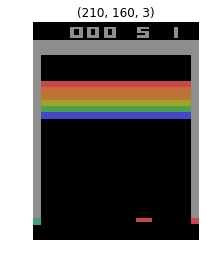

In [4]:
rgb_frame = env.reset()

plt.figure()
plt.title(f'{rgb_frame.shape}')
plt.axis('off')
plt.imshow(rgb_frame)
plt.show()

### Instantiate DQN

In [5]:
tf.reset_default_graph()

dqn = DQN(state_shape=STATE_SHAPE, action_size=ACTION_SIZE, dqn_name='DQN')

### Test and watch how the agent plays Breakout-v0

In [6]:
def test(dqn, env, episode=NUM_EPISODES):
    frames = []
    with tf.Session() as sess:
        # load the model
        tf.train.Saver().restore(sess, SAVE_PATH + f'/model_episode_{episode}.ckpt')
        
        step = 0
        total_reward = 0
        done = False
        stacked_frames = []
        
        state = env.reset()
        frames.append(state)
        state, stacked_frames = stack_frames(stacked_frames, state, 
                                             is_new_episode=True)
        env.render()
        
        while not done:
            state = state.reshape([1, *STATE_SHAPE])
            Q = sess.run(dqn.output,
                         feed_dict={
                             dqn.input_ph: state
                         })
            
            action_idx = np.argmax(Q)
            action = POSSIBLE_ACTIONS[action_idx]

            next_state, reward, done, _ = env.step(action)
            frames.append(next_state)
            next_state, stacked_frames = stack_frames(stacked_frames, next_state,
                                                      is_new_episode=False)
            state = next_state
            env.render()
            
            step += 1
            total_reward += reward
            
            if step % 500 == 0:
                print(f'step: {step}, action_idx: {action_idx}, Q: {Q}')
        
        print(f'Steps: {step}, total_reward: {total_reward}')
    return episode, total_reward, frames

In [7]:
episode, reward, frames = test(dqn, env)
frames = np.array(frames)

INFO:tensorflow:Restoring parameters from ./checkpoints/model_episode_500.ckpt
step: 500, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 1000, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 1500, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 2000, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 2500, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 3000, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 3500, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 4000, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 4500, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 5000, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 5500, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102 0.23061523]]
step: 6000, action_idx: 0, Q: [[0.2306676  0.23066103 0.23063102

In [8]:
%%time
#save_ani(episode, int(reward), frames, fps=15, skip_frames=2, 
#         out_path='./animations/test/', mode='test')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [9]:
#env.close()